## Import Necessary Libraries

In [1]:
import pandas as pd #import pandas libarary
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE #import sampling
import numpy as np
from sklearn.model_selection import train_test_split #data split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # importing decision tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay # visualize metrics

## loading the dataset for the creation of the model

In [2]:
df_train =pd.read_csv('D:/dis_cmp/2023-027/Disease/dataset/env_data881.csv')
#display few records available in the dataset with the column names
df_train.head()

,date,time,temperature,humidity,ventilation,light_intensity,ph,disease growth possibility level
0,6/14/2018,8:30,22.40,82,low,high,6.9,High
1,6/14/2018,11:40,14.29,61,high,medium,8.6,Low
2,6/14/2018,14:30,13.47,86,low,medium,8.7,Moderate
3,6/14/2018,17:40,12.84,60,high,medium,8.1,Low
4,6/15/2018,8:30,27.84,83,low,high,6.8,High


In [3]:
# getting all the information regarding the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              7124 non-null   object 
 1   time                              7124 non-null   object 
 2   temperature                       7124 non-null   float64
 3   humidity                          7124 non-null   int64  
 4   ventilation                       7118 non-null   object 
 5   light_intensity                   7118 non-null   object 
 6   ph                                7118 non-null   float64
 7   disease growth possibility level  7124 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 445.4+ KB


## Checking for null and duplicate values

In [4]:
# here the code  is checking weather any nulls values are in the datset
df_train.isnull().sum()

date                                0
time                                0
temperature                         0
humidity                            0
ventilation                         6
light_intensity                     6
ph                                  6
disease growth possibility level    0
dtype: int64

In [5]:
#checking weather any duplicate values are in the datset
df_train.duplicated().sum()

90

In [6]:
df_train.dropna(inplace=True)#drop null values

## Drop unnecessary columns

In [7]:
df_data = df_train.drop(['date','time'], axis=1)# drop columns 

In [8]:
#print unique values
print("Unique 'ventilation': {}".format(df_data['ventilation'].unique()))
print("Unique 'light_intensity': {}".format(df_data['light_intensity'].unique()))
print("Unique 'possibility for disease growth': {}".format(df_data['disease growth possibility level'].unique()))

Unique 'ventilation': ['low' 'high' 'medium']
Unique 'light_intensity': ['high' 'medium' 'low']
Unique 'possibility for disease growth': ['High' 'Low' 'Moderate']


## Convert categorical to numerical values

In [9]:
#label encoder used to convert numerical data
label_prediction = LabelEncoder()

In [10]:
#fit and transform the labels
category_labels2 = {'High': 0, 'Moderate': 1, 'Low' : 2}
df_data['disease growth possibility level']= label_prediction.fit_transform([category_labels2.get(cat) for cat in df_data['disease growth possibility level']])
df_data

,temperature,humidity,ventilation,light_intensity,ph,disease growth possibility level
0,22.40,82,low,high,6.9,0
1,14.29,61,high,medium,8.6,2
2,13.47,86,low,medium,8.7,1
3,12.84,60,high,medium,8.1,2
4,27.84,83,low,high,6.8,0
...,...,...,...,...,...,...
7119,9.14,80,high,low,8.4,1
7120,32.85,57,low,high,5.3,1
7121,10.57,53,high,low,8.2,2
7122,28.94,78,medium,high,6.4,0


In [11]:
#Index the string to numeric using one-hot
cat_cols = ['ventilation', 'light_intensity']
df = pd.get_dummies(df_data, columns=cat_cols)
df

,temperature,humidity,ph,disease growth possibility level,ventilation_high,ventilation_low,ventilation_medium,light_intensity_high,light_intensity_low,light_intensity_medium
0,22.40,82,6.9,0,0,1,0,1,0,0
1,14.29,61,8.6,2,1,0,0,0,0,1
2,13.47,86,8.7,1,0,1,0,0,0,1
3,12.84,60,8.1,2,1,0,0,0,0,1
4,27.84,83,6.8,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7119,9.14,80,8.4,1,1,0,0,0,1,0
7120,32.85,57,5.3,1,0,1,0,1,0,0
7121,10.57,53,8.2,2,1,0,0,0,1,0
7122,28.94,78,6.4,0,0,0,1,1,0,0


# Inter-feature Correlation
heatmap can be used to check correlation between variables

<Axes: >

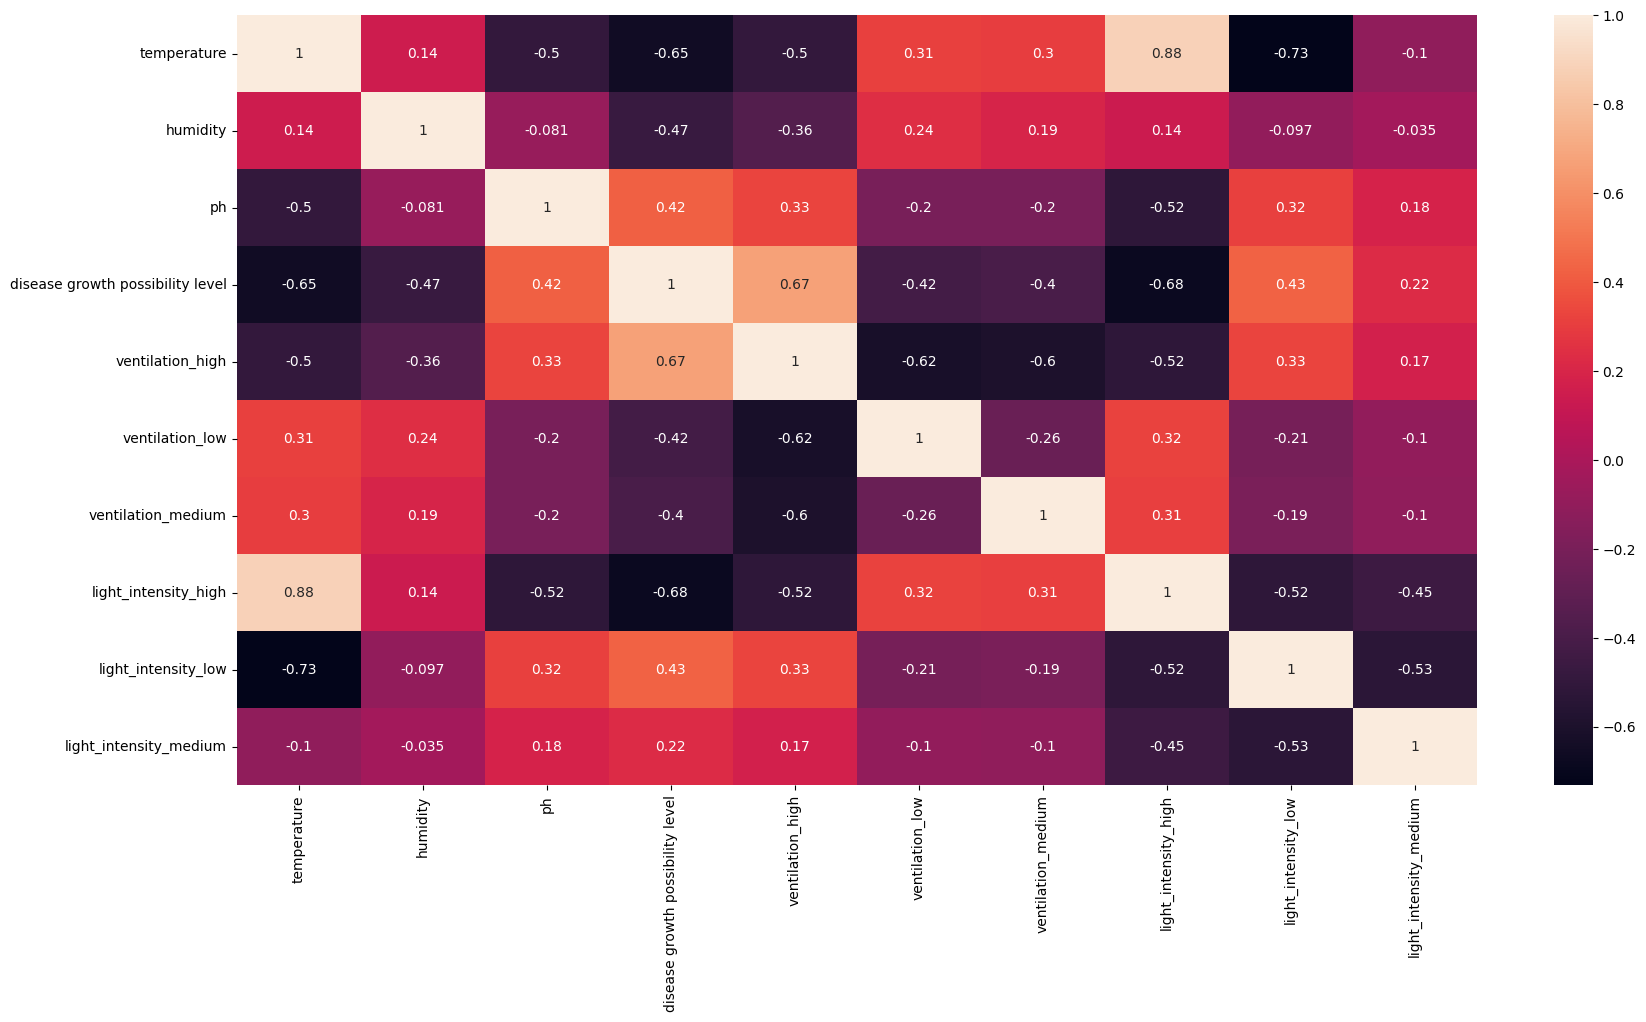

In [12]:
import seaborn as sns
hm=df
plt.figure(figsize = (20, 10))
sns.heatmap(hm.corr(), annot = True)

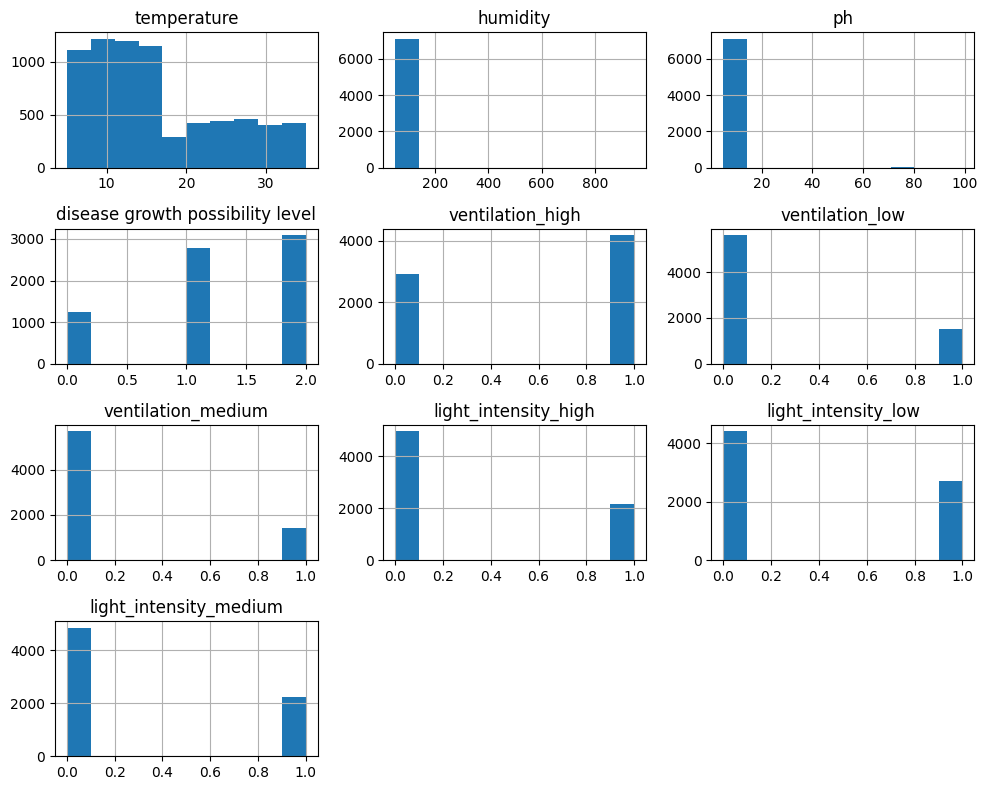

In [13]:
# Histogram of Features
fig = df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

# Class (Target) Distribution
Now, let's take a look at the distribution of class (target).If the class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class.

In [14]:
df['disease growth possibility level'].value_counts()

2    3094
1    2784
0    1240
Name: disease growth possibility level, dtype: int64

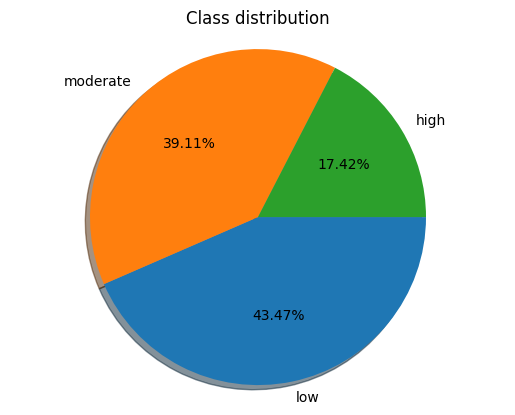

# samples associated with high level possibility for disease growth: 1240
# samples associated with moderate level possibility for disease growth: 2784
# samples associated with low level possibility for disease growth: 3094


In [15]:
class_occur = df['disease growth possibility level'].value_counts()
class_names = ['low','moderate', 'high']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with high level possibility for disease growth: {}".format(class_occur[0]))
print("# samples associated with moderate level possibility for disease growth: {}".format(class_occur[1]))
print("# samples associated with low level possibility for disease growth: {}".format(class_occur[2]))


In [16]:
# create the  object with the desired sampling strategy.
smote = SMOTE()

# fit the object to our training data
x, y = smote.fit_resample(df.loc[:,df.columns!='disease growth possibility level'], df['disease growth possibility level'])
print("Shape of X: {}".format(x.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (9282, 9)
Shape of y: (9282,)


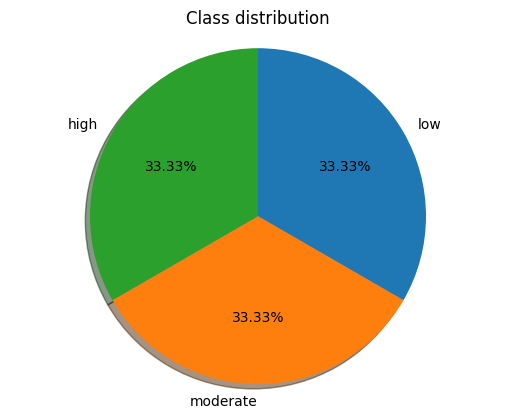

# samples associated with high level possibility for disease growth: 3094
# samples associated with moderate level possibility for disease growth: 3094
# samples associated with low level possibility for disease growth: 3094


In [17]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['low', 'moderate','high']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with high level possibility for disease growth: {}".format(class_counts[0]))
print("# samples associated with moderate level possibility for disease growth: {}".format(class_counts[1]))
print("# samples associated with low level possibility for disease growth: {}".format(class_counts[2]))

## Data splitting

In [18]:
x_Train, x_Test, y_Train, y_Test = train_test_split( x, y, test_size = 0.3, random_state = 42)
print("Training data : ", x_Train.shape) #print the count that is used to train
print("Testing data : ", x_Test.shape) #print the count that is used to test

Training data :  (6497, 9)
Testing data :  (2785, 9)


## Building Model - Decision Tree

In [19]:
#build model
model = DecisionTreeClassifier(random_state=42)
results = model.fit(x_Train, y_Train)
y_prediction = results.predict(x_Test) 

In [20]:
train_predictions = results.predict(x_Train)
train_accuracy = accuracy_score(y_Train, train_predictions)
y_prediction = results.predict(x_Test) 
print("Training Accuracy:", train_accuracy)#get training accuracy

Training Accuracy: 0.9979990764968447


## Evaluating the Model
test predictions

In [21]:
print("Decision Tree Classification : \n", classification_report(y_Test,y_prediction))# Classification report

Decision Tree Classification : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       930
           1       0.90      0.90      0.90       916
           2       0.93      0.92      0.93       939

    accuracy                           0.93      2785
   macro avg       0.93      0.93      0.93      2785
weighted avg       0.93      0.93      0.93      2785



In [22]:
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_Test,y_prediction)))# Confusion matrix

Confusion matrix for DT: 
[[895  30   5]
 [ 37 823  56]
 [ 15  61 863]]


In [23]:
print("Accuracy score for DT: {:.6f}".format(accuracy_score(y_Test,y_prediction)))

Accuracy score for DT: 0.926750


Text(0.5, 1.0, 'Actual vs Fitted Values for Yield')

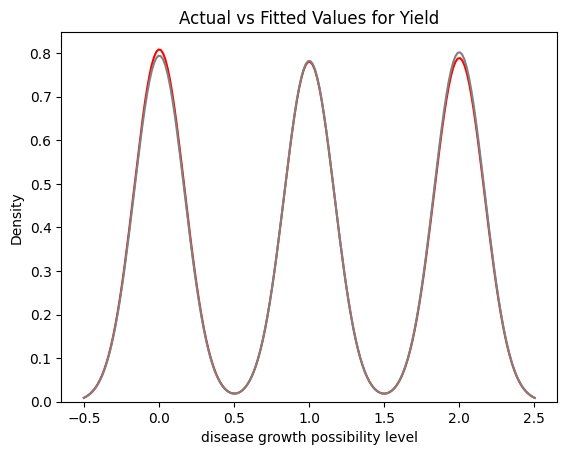

In [24]:
ax = sns.kdeplot(y_prediction, color="red", label="Actual Value")
sns.kdeplot(y_Test, color="grey", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Yield')

Text(0.5, 1.0, 'Actual vs Fitted Values for Yield')

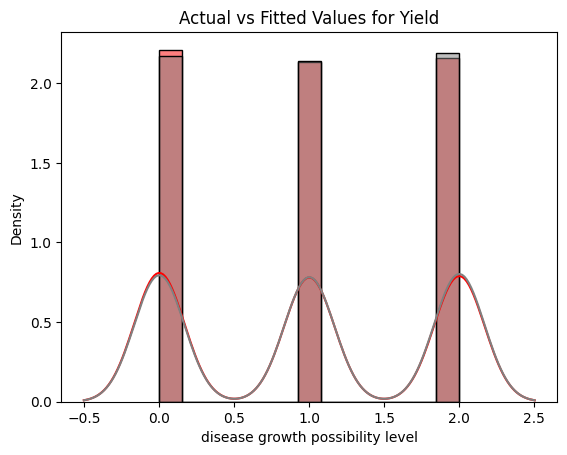

In [25]:
ax = sns.histplot(y_prediction,kde=True, stat="density",kde_kws=dict(cut=3),color="r", label="Actual Value")
sns.histplot(y_Test, kde=True, stat="density", kde_kws=dict(cut=3),color="grey", label="Fitted Values", ax=ax)
plt.title('Actual vs Fitted Values for Yield')